![alt text](img/LM.png)
# Kurs: Warsztaty Machine learning w Pythonie

## Prowadzący: Piotr Ćwiakowski

## Autorzy: Maciej Wilamowski,  Piotr Ćwiakowski

### Lekcja 11. Regularyzacja

#### Spis treści:
1. Wprowadzenie
2. Regularyzacja L1, L2, Elastic.Net 
3. Regularyzacja przy dużej liczbie zmiennych z korelacjami

## 1. Wprowadzenie
Wraz z rozwojem kolejnych technik modelowania i znacznym zwiększeniem ilości zbieranych informacji (szczególnie pod względem liczby zmiennych) problem nadmiernego dopasowania (przetrenowanie, overfitting) modeli był coraz większy. Liczba parametrów w estymowanych modelach wzrasta często do tego stopnia, że przetrenowanie poważnie ogranicza moc predykcyjną modelu. Jednym z pomysłów na rozwiązanie tego problemu jest regularyzacja.

Regularyzacja to nic innego jak włączenie do funkcji straty informacji o wielkości parametrów w modelu. Załóżmy, że  estymator $\hat{F}(X)$ dobiera wektor parametrów $\hat{\beta}$ aby minimalizować $L(y-\hat{y})$. Regularyzacja rozszerza funkcję straty, tak że $L' = L(y-\hat{y}) + R(\hat{\beta})$. Gdzie $R(\hat{\beta})$ to dodatkowy koszt generowany przez wektor parametrów $\hat{\beta}$ - regularyzacja.

### 1.1 Dlaczego regularyzować model?
Wprowadzenie regularyzacji do modelu ma na celu rozwiązanie problemu nadmiernego dopasowania, który wynika z wariancji oszacowań powstałej w wyniku elastyczności estmatora pochodzącej z nadmiernej liczby lub wielkości parametrów. Co powoduje, że dodanie kosztu, zależnego od liczby i wielkości parametrów, pomaga w tym problemie?

Wyobraźmy sobie, że jesteśmy optymalizatorem budującym dany estymator $\hat{F}(X)$. Kiedy wprowadzanie kolejnych nawet najmniejszych zmian w naszym estymatorze "nic nas nie kosztuje", będziemy go zmieniać tak długo aż stwierdzimy, że nic już się nie da poprawić. Pamiętajmy, że w uczeniu nadzorowanym estmator bazuje na zbiorze treningowym. Uczenie polega tak naprawdę na dopasowywaniu estymatora w taki sposób aby tłumaczył powstawanie obserwacji w zbiorze treningowym. To zbliża $\hat{F}(X)$ do prawdziwego $F(X)$ poniekąd przy okazji. Metoda uczenia nadzorowanego działa, ponieważ zwykle najprościej wytłumaczyć obserwacje w zbiorze treningowym zasadami, które pokrywają się z prawdą.

Przykładowo, gdyby naszym celem było wytłumaczenie wagi osób w populacji i mielibyśmy możliwość zastosowania tylko jednej reguły, to prawdopodobnie powiedzielibyśmy, że im wyższa osoba tym cięższa. Gdy ktoś pozwolił nam dodać drugą regułą to pewnie powiemy, że mężczyźni są ciężsi niż kobiety, itd. W pewnym momencie pomysły na "sensowne" reguły się jednak kończą i dalej możemy już wymyślać tylko reguły które de facto opisują populacje w zbiorze treningowym, a nie ogólne prawidłowości.

Spowodowanie, że dodawanie kolejnych reguł jest kosztowne powoduje, że estymator "bierze pod uwagę" trade-off pomiędzy kosztem wprowadzenia reguły a tym jak bardzo jej wprowadzenie poprawia funkcję straty. W zależności od wysokości kosztu i skuteczności reguły może zrezygnować z jej wprowadzania. Dodatkowo "w pierwszej kolejności" wprowadzi jedynie te reguły które najmocniej redukują funkcję straty.

## 2. Regularyzacja L1, L2 i Elastic.Net
Załóżmy, że funkcja straty opisana jest następującym wzorem:

$$L' = L(y-\hat{y}) + R(\hat{\beta})$$

gdzie: 
* $L(y-\hat{y})$ to funkcja straty bez regularyzacji, a 
* $R(\hat{\beta})$ to nasze wyrażenie regularyzacyjne. 

Rozważmy teraz problem estymacji parametrów z regularyzacją na przykładzie regresji liniowej:

$$L'=\sum_{i=1}^{N}{(y-X\hat{\beta})^2} + R(\hat{\beta})$$

Zwykle stosować będziemy jedną z trzech form regularyzacji, $L_1$ (Lasso), $L_2$ (Ridge) lub kombinacji $L_1$ i $L_2$, tzw. *Elastic Net*.
* Lasso:
$$R_{L_1} = \alpha \sum_{j=0}^{k} |\beta_j|$$
* Ridge
$$R_{L_2} = \beta \sum_{j=0}^{k} \beta_j^2$$
* Elastic Net 
$$R_{EN} = \alpha \sum_{j=0}^{k} (\gamma|\beta_j| + (1-\gamma)\beta_j^2)$$
przedstawiany często jako:  
$$R_{EN} = \alpha \sum_{j=0}^{k} |\beta_j| + \beta \sum_{j=0}^{k}\beta_j^2$$

* Kiedy wprowadzamy regularyzację, znalezienie optymalnych parametrów nie jest możliwa analitycznie. Konieczne jest stosowanie optymalizacji numerycznej.
* Kiedy stosujemy wyłącznie regularyzację L1 możliwe jest istnienie kilku optymalnych rozwiązań.
* Stosowanie Elastic Net często prowadzi do grupowania zmiennych - zmienne skorelowane otrzymują podobne wagi.

Różnicę teoretyczną między obydwoma sposobami ograniczenia wielkości parametrów możemy dobrze ilustruje poniższy rysunek:

<img src="img/regularyzacja1.png" width="80%">
Źródło: https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

### 2.1. Praktyczna różnica pomiędzy regularyzacją L1 i L2
Zastanówmy się teraz, jaki wpływ na wielkości parametrów mają opisane komponenty regularyzacyjne. Jak wygląda pierwsza pochodna z regularyzacji L1 i L2? W jednym przypadku jest stała, a w drugim malejąca wraz ze spadkiem wielkości parametru. Nieco upraszczając można powiedzieć, że Ridge (L2) prawie nigdy nie będzie wygaszał parametrów do zera, a Lasso (L1) będzie kolejno wygaszał najmniej przydatne parametry.

Trzy zaprezentowane metody różnią się nie tylko formą funkcyjną, ale również sposobem docierania do optymalnego rozwiązania. W przypadku Lasso nie tylko zmniejszane są parametry modelu, ale de facto przeprowadzana jest również selekcja (eliminacja), gdy parametry przy zmiennych osiągną wartość zero.

**UWAGA.** Warto zwrócić uwagę na wersję pakietu sklearn, gdyż pomiędzy wersjami 0.17 a 0.22 zaszło sporo zmian w implementacji modelu liniowego z regularyzacją.

In [1]:
%matplotlib inline
# Autor: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# X jest macierzą Hilberta 10x10 (https://en.wikipedia.org/wiki/Hilbert_matrix)
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# policzmy ścieżki dla różnych wartości alfa
n_alphas = 200
# Policzenie wektora liczonych swartości alfa  na skali logarytmicznej
alphas = np.logspace(-10, -2, n_alphas)

# Lista współczynników kolejnych modeli
coefsR = []
coefsL = []
# Pętla po wartościach alfa
for a in alphas:
    # regularyzacja L2
    ridge = linear_model.Ridge(alpha=a, max_iter=100000, fit_intercept=False)
    ridge.fit(X, y)
    # zapisanie parametrów
    coefsR.append(ridge.coef_)
    
    # regularyzacja L1
    lasso = linear_model.Lasso(alpha=a, max_iter=100000,  fit_intercept=False)
    lasso.fit(X, y)
    # zapisanie parametrów
    coefsL.append(lasso.coef_)

Text(0.5, 1.0, 'Lasso coefficients as a function of the regularization')

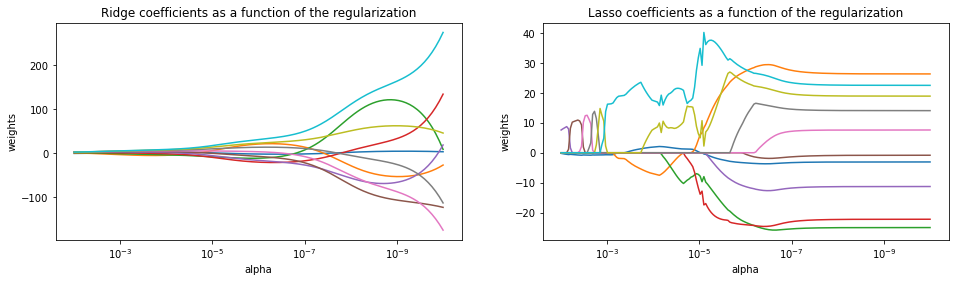

In [2]:
# Wizualizacja wyników
fig = plt.figure(figsize = (16, 4))
ax = fig.add_subplot(1, 2, 1)
ax = plt.gca()
ax.plot(alphas, coefsR)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.set_xlabel('alpha')
ax.set_ylabel('weights')
ax.set_title('Ridge coefficients as a function of the regularization')
# plt.axis('tight')

ax = fig.add_subplot(1, 2, 2)
ax = plt.gca()
ax.plot(alphas, coefsL)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.set_xlabel('alpha')
ax.set_ylabel('weights')
ax.set_title('Lasso coefficients as a function of the regularization')
# ax.set_axis('tight')

Ciekawe podsumowanie różnych metod regularyzacji można znaleźć w książce *Elements of statistical learning*. Autorzy wygenerowali dwa zbiory danych z trzema zmiennymi (x1, x2, $y = 4*x1 + 2*x2 + e$), przy czym w pierwszym zbiorze korelacja x1 i x2 wynosiła 0,5 a w drugi -0,5. Następnie dla obydwu zbiorów oszacowano (dla różnych wartości hiperparametrów) następujące równania modele: *Lasso*, *Ridge regression*, *Stepwise regression (Best subset)*, *Principal Component Regression*, *Partial Least Squares* analizując ich ewolucję od modelu ze stałą (beta1=0 i beta2=0) do modelu pełnego *OLS*.

<img src="img/regularyzacja2.png" width="70%">

### 2.2. Regularyzacja przy dużej liczbie zmiennych
Wykorzystamy dane pogodowe, opisujące temperaturę w Mediolanie w każdej godzinie dni grudniowych.

<AxesSubplot:xlabel='hour', ylabel='temp'>

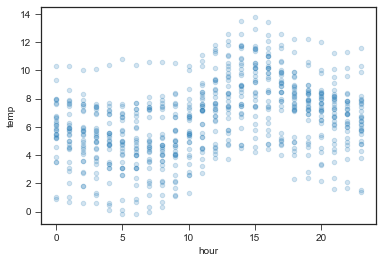

In [1]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline
milanoTemp = pd.read_csv("data/milanoDecTemp.csv")
milanoTemp.plot.scatter("hour", "temp", alpha=0.2)

**Benchmark.** Sprawdźmy jak zachowa się model regresji liniowej bez regularyzacji, kiedy jako zmienne objaśniające wykorzystywane będą kolejne stopnie wielomianu.

In [3]:
from sklearn import linear_model

In [4]:
features = ["hour"]
preds = []
coefs = []
hours = pd.DataFrame(list(range(24)), columns=["hour"])

for power in range (2, 11):
    # Stworzenie zmiennej z kolejnym stopniem wielomianu
    milanoTemp["hour"+str(power)] = milanoTemp.hour**power 
    hours["hour"+str(power)] = hours.hour**power 
    features.append("hour"+str(power))
    # Stworzenie i dopasowanie modelu regresji liniowej
    regr = linear_model.LinearRegression()
    regr.fit(milanoTemp[features], milanoTemp["temp"])
    # Generowanie predykcji
    pred = regr.predict(hours[features])
    preds.append(pred)
    # Zapisanie współczynników jako słownika na liście coefs
    coefs.append(dict(zip(hours.columns, regr.coef_)))
# DataFream z listą współczynników
coefs = pd.DataFrame(coefs)[hours.columns.tolist()]
coefs

hour     hour2     hour3     hour4     hour5         hour6  \
0  0.348057 -0.009156       NaN       NaN       NaN           NaN   
1 -0.750489  0.112327 -0.003515       NaN       NaN           NaN   
2 -1.240716  0.212450 -0.010355  0.000148       NaN           NaN   
3  0.283658 -0.288461  0.049242 -0.002788  0.000051           NaN   
4  0.405457 -0.347770  0.060002 -0.003680  0.000085 -4.966826e-07   
5 -1.143526  0.707940 -0.210229  0.029497 -0.002017  6.577101e-05   
6 -0.945732  0.527336 -0.148372  0.019058 -0.001056  1.661494e-05   
7 -0.099370 -0.467154  0.288507 -0.077198  0.010907 -8.600112e-04   
8 -0.480253  0.087434 -0.013346  0.006366 -0.002451  4.462237e-04   

          hour7         hour8         hour9        hour10  
0           NaN           NaN           NaN           NaN  
1           NaN           NaN           NaN           NaN  
2           NaN           NaN           NaN           NaN  
3           NaN           NaN           NaN           NaN  
4           NaN           NaN           NaN           NaN  
5 -8.224628e-07           NaN           NaN           NaN  
6  4.900171e-07 -1.425824e-08           NaN           NaN  
7  3.803339e-05 -8.830760e-07  8.389369e-09           NaN  
8 -4.131291e-05  2.037611e-06 -5.125208e-08  5.183716e-10

Nasz wieloman zaczyna mieć sporą łatwość lokalnego dopasowywania, co również widać najlepiej dla wielomianów 5-7 stopnia na rysunku poniżej. Zwróćmy uwagę, że algorytm regresji liniowej, mimo dużej liczby stopni swobody jest trudny do przetrenowania.

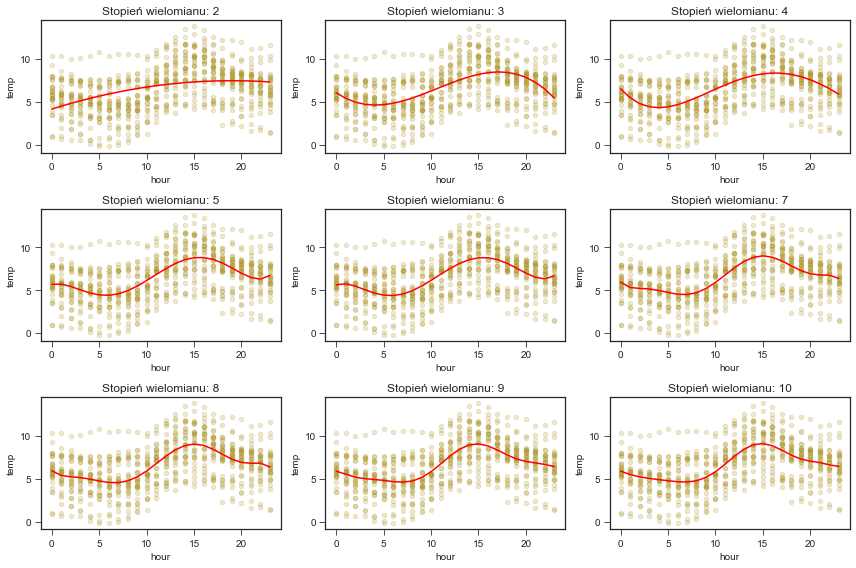

In [5]:
fig, ax = plt.subplots(3, 3, figsize=(12,8))
ax = ax.flatten()
for i, axe in enumerate(ax):
    milanoTemp.plot.scatter("hour", "temp", alpha=0.2, ax=axe, c = '#a98d19')
    axe.plot(preds[i],  color = 'red')
    axe.set_title("Stopień wielomianu: {0}".format(i+2))

plt.tight_layout()
plt.show()

Sprawdźmy teraz w walidacji krzyżowej, który stopień wielomianu jest naprawdę najlepszy w tym przypadku. Zauważmy, jak duże są różnice pomiędzy zbiorem treningowym a testowym, kiedy nie stosujemy regularyzacji. Jak zawsze na początku przygotujemy sobie funkcję do walidacji krzyżowej. Tym razem wykonamy kolejny krok i pozwolimy na to, aby sam klasyfikator również był argumentem. Podmienimy algorytm oraz sposób liczenia predykcji (`predict` zamiast `predict_proba`) i metryki (`mse` zamiast `rocauc`). Przy okazji zobaczymy zatem rozbudowany wrapper dla problemu regresyjnego.

### 2.2.1 Regresja liniowa

In [6]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

# Przygotujmy prosty wrapper
def CVTestLinearReg(nFolds = 5, randomState=2020, method = "linear", debug=False, features=features, 
                    saveModels = False, *args, **kwargs):
    # Przygotujmy walidację krzyżową
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)
    # Zapiszmy wyniki na zbiorze treningowym i testowym:
    testResults = []
    trainResults = []
    # Przechowajmy również predykcje dla poszczególnych foldów
    predictions = []
    # Razem z informacją o tym, jaki był ich indeks w oryginalnym zbiorze danych
    indices = []
    # Przygotujmy liste modeli do zachowania
    models = []
    
    for train, test in kf.split(df.index.values):
        algorithm = {
        "linear":linear_model.LinearRegression,
        "lasso":linear_model.Lasso,
        "ridge":linear_model.Ridge,
        "elastic":linear_model.ElasticNet
        }
        # Przygotowanie estymatora
        clf = algorithm[method](*args, **kwargs)
        if debug:
            print(clf)
        # Trenowanie modelu
        clf.fit(df.iloc[train][features], df.iloc[train][target])

        # Przygotowanie prognoz dla zbioru traeningowego i testowego
        # UWAGA Sklearn zwracałbędzie dwie kolumny prawdopodobieństw dla obydwu klas
        predsTrain = clf.predict(df.iloc[train][features])
        preds = clf.predict(df.iloc[test][features])
        
        # Zachowajmy informacje o predykcjach dla tego foldu
        predictions.append(preds.tolist().copy())
        
        # Razem z indeksami w oryginalnym data frame
        indices.append(df.iloc[test].index.tolist().copy())
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi możemy opcjonalnie wyświetlać w trakcie
        trainScore = mean_squared_error(df[target].iloc[train], predsTrain)
        testScore = mean_squared_error(df[target].iloc[test], preds)
        
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        if debug:
            print("Train MSE:", trainScore,
                  "Valid MSE:", testScore)
        if saveModels:
            models.append(clf)
        
    return trainResults, testResults, predictions, indices, models

In [7]:
df = milanoTemp
target = "temp"
df.shape

(723, 11)

In [8]:
trainResults, testResults, predictions, indices, models = CVTestLinearReg(method="linear")
print(np.mean(trainResults), np.mean(testResults))

4.907408998912667 5.1422922451639845


### 2.2.2 Lasso
Teraz wykonamy obliczenia wielokronie w pętli stosując lasso. Dzięki temu, że stosujemy model liniowy z wykorzystaniem sklearn wystarczy zmienić jedną linię.

In [10]:
for alpha in [0.001, 0.01, 0.1, 0.25, 0.5, 1, 2, 5]:
    trainResults, testResults, predictions, indices, models = CVTestLinearReg(method="lasso", alpha=alpha, random_state=2020,
                                                                              max_iter = 1000)
    print("Alpha:", alpha, "Train", np.mean(trainResults), "Test", np.mean(testResults))

C:\Users\pcwia\miniconda3\envs\ds\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.460e+03, tolerance: 4.060e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\pcwia\miniconda3\envs\ds\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.482e+03, tolerance: 4.064e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\pcwia\miniconda3\envs\ds\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Alpha: 0.001 Train 5.056158408980586 Test 5.203801446316699
Alpha: 0.01 Train 5.056135183924319 Test 5.203725926056206
Alpha: 0.1 Train 5.064855472386511 Test 5.21221131735515
Alpha: 0.25 Train 5.1162469116597125 Test 5.2643827028863015
Alpha: 0.5 Train 5.246372714834051 Test 5.384266185132223
Alpha: 1 Train 5.245053691082665 Test 5.384181249878367
Alpha: 2 Train 5.252942424261237 Test 5.3924585436334755
Alpha: 5 Train 5.261863973408762 Test 5.401962776699352


C:\Users\pcwia\miniconda3\envs\ds\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.476e+03, tolerance: 4.035e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\pcwia\miniconda3\envs\ds\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.524e+03, tolerance: 4.231e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\pcwia\miniconda3\envs\ds\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Jak widać wyniki nie tylko nie uległy poprawie, ale wręcz pogorszeniu. Co prawda różnica w metryce pomiędzy zbiorem treningowym a testowym zmniejszyła się zdecydowanie, ale nie jest to zadowalający efekt. Zobaczmy czy lepsze wyniki uzyskamy stosując ridge w tym przypadku.

### Ridge

In [12]:
import warnings
warnings.filterwarnings("ignore")

for alpha in [0.1, 0.5, 2, 5, 10, 20, 100, 500, 1000]:
    trainResults, testResults, predictions, indices, models = CVTestLinearReg(method="ridge", alpha=alpha, random_state=2020)
    print("Alpha:", alpha, "Train", np.mean(trainResults), "Test", np.mean(testResults))

warnings.filterwarnings('default')

Alpha: 0.1 Train 4.907478064157155 Test 5.138084069091083
Alpha: 0.5 Train 4.908016880892826 Test 5.130699156945158
Alpha: 2 Train 4.908949016525784 Test 5.123674459709282
Alpha: 5 Train 4.909556913723143 Test 5.119536793033144
Alpha: 10 Train 4.910162221957487 Test 5.116272761973122
Alpha: 20 Train 4.911057072544038 Test 5.113018003282609
Alpha: 100 Train 4.913583769446913 Test 5.107296971906598
Alpha: 500 Train 4.9163503990254815 Test 5.103960590589189
Alpha: 1000 Train 4.918482578988629 Test 5.1035407983936185


Stosując ridge po raz pierwszy widzimy minimalną poprawę. Co więcej, widzimy jak systematycznie spada wielkość RMSE na zbiorze testowym wraz ze wzrostem parametru alpha.

### Elastic Net
Ponieważ Lasso nie przynosiło w tym przypadku dobrych wyników nie spodziewamy się świętnych wyników z Elastic Net, który będzie kombinacją Ridge i Lasso. Uruchamiając Elastic Net, musimy określić zarówno siłę regularyzacji jak i względny udział Lasso i Ridge (mixing parameter) - będziemy iterować po dwóch parametrach.

In [13]:
import warnings
warnings.filterwarnings("ignore")

for ratio in [0.00001, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99999]:
    for alpha in [0.001, 0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10, 20, 100]:
        trainResults, testResults, predictions, indices, models = CVTestLinearReg(method="elastic",
                                                                                  alpha=alpha, l1_ratio = ratio, random_state=2020)
        print("Ratio", ratio, "Alpha:", alpha, "Train", np.mean(trainResults), "Test", np.mean(testResults))

warnings.filterwarnings('default')

Ratio 1e-05 Alpha: 0.001 Train 5.056171086722821 Test 5.203798114768463
Ratio 1e-05 Alpha: 0.01 Train 5.056219487202261 Test 5.2036520037751135
Ratio 1e-05 Alpha: 0.1 Train 5.06025458624692 Test 5.206134711683502
Ratio 1e-05 Alpha: 0.25 Train 5.074405955455428 Test 5.218719224147912
Ratio 1e-05 Alpha: 0.5 Train 5.101267077348128 Test 5.244253140080852
Ratio 1e-05 Alpha: 1 Train 5.141990383917303 Test 5.283861394086609
Ratio 1e-05 Alpha: 2 Train 5.182766939818291 Test 5.323824754801458
Ratio 1e-05 Alpha: 5 Train 5.21822374032199 Test 5.358586879505844
Ratio 1e-05 Alpha: 10 Train 5.2310719938337575 Test 5.371075663839465
Ratio 1e-05 Alpha: 20 Train 5.235674060917118 Test 5.375345716735585
Ratio 1e-05 Alpha: 100 Train 5.229683562673225 Test 5.368575321899728
Ratio 0.1 Alpha: 0.001 Train 5.056169816502882 Test 5.203798444210731
Ratio 0.1 Alpha: 0.01 Train 5.056210338919833 Test 5.203658529870343
Ratio 0.1 Alpha: 0.1 Train 5.0605191239763325 Test 5.206531121799756
Ratio 0.1 Alpha: 0.25 Trai

Niestety Elastic.Net nie pomogło, co było do przewidzenia.

## 3. Regularyzacja przy dużej liczbie zmiennych z korelacjami

W tym przykładzie wykorzystamy zbiór danych z UCI dotyczacy poziomu przestępczości w wybranych społecznościach.

Opis zbioru po angielsku:

*Many variables are included so that algorithms that select or learn weights for attributes could be tested. However, clearly unrelated attributes were not included;  attributes were picked if there was any plausible connection to crime (N=122), plus  the attribute to be predicted (Per Capita Violent Crimes). The variables included in  the dataset involve the community, such as the percent of the population considered  urban, and the median family income, and involving law enforcement, such as per capita  number of police officers, and percent of officers assigned to drug units.*

*All numeric data was normalized into  the decimal range 0.00-1.00 using an Unsupervised, equal-interval binning method.  Attributes retain their distribution and skew (hence for example the population  attribute has a mean value of 0.06 because most communities are small)*

W calym zbiorze danych są 122 zmienne objasniające. Ograniczymy naszą analizę do 96 zmiennych.

In [14]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

df = pd.read_csv("data/communities.csv", decimal=",")
print(df.shape)

# 96 zmiennyc używanych w analizie:
features = ['fold', 'PctHousOccup', 'HousVacant', 'MedNumBR', 'PctHousLess3BR', 'PctPersDenseHous', 
            'PctPersOwnOccup', 'PersPerRentOccHous', 'PersPerOwnOccHous', 'PersPerOccupHous', 
            'PctLargHouseOccup', 'PctLargHouseFam', 'PctNotSpeakEnglWell', 'LemasPctOfficDrugUn', 
            'PctRecImmig10', 'PctRecImmig8', 'PctRecImmig5', 'PctRecentImmig', 'PctImmigRec10', 
            'PctImmigRec8', 'PctImmigRec5', 'PctImmigRecent', 'PctHousOwnOcc', 'PctVacantBoarded', 
            'PctVacMore6Mos', 'MedYrHousBuilt', 'PctUsePubTrans', 'PopDens', 'LandArea', 'PctSameState85', 
            'PctSameCity85', 'PctSameHouse85', 'PctBornSameState', 'PctForeignBorn', 'NumStreet', 
            'NumInShelters', 'NumImmig', 'MedOwnCostPctIncNoMtg', 'MedRentPctHousInc', 'MedRent', 
            'RentHighQ', 'RentMedian', 'RentLowQ', 'OwnOccHiQuart', 'OwnOccMedVal', 'OwnOccLowQuart', 
            'PctWOFullPlumb', 'PctHousNoPhone', 'MedOwnCostPctInc', 'PctIlleg', 'PctSpeakEnglOnly', 
            'PctWorkMom', 'whitePerCap', 'perCapInc', 'medFamInc', 'pctWRetire', 'pctWPubAsst', 
            'pctWSocSec', 'pctWInvInc', 'pctWFarmSelf', 'NumIlleg', 'medIncome', 'blackPerCap', 
            'pctUrban', 'agePct65up', 'agePct16t24', 'agePct12t29', 'agePct12t21', 'householdsize', 
            'population', 'numbUrban', 'indianPerCap', 'pctWWage', 'FemalePctDiv', 'PctTeen2Par', 
            'PctKids2Par', 'PctFam2Par', 'PersPerFam', 'TotalPctDiv', 'PctYoungKids2Par', 
            'MalePctNevMarr', 'MalePctDivorce', 'PctOccupMgmtProf', 'PctWorkMomYoungKids', 
            'PctOccupManu', 'PctEmplManu', 'PctEmploy', 'PctUnemployed', 'PctBSorMore', 'PctNotHSGrad', 
            'PctLess9thGrade', 'PctPopUnderPov', 'NumUnderPov', 'HispPerCap', 'PctEmplProfServ', 'AsianPerCap']
print(len(features))

(1994, 128)
96


Zmienna objaśniana jest zmienną ciągłą, ale z łatwością możemy ja zmienić na dyskretną gdyż obserwujemy nietypowy wzrost w rozkłądzie dla wartości w okolicach 0.45. Dzięki temu sprawdzimy jak możemy wykorzystać regularyzację w problemie klasyfikacji.

<AxesSubplot:>

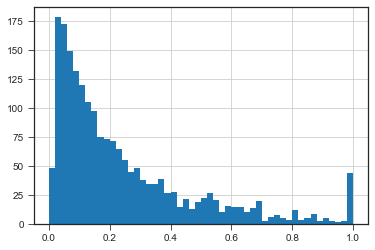

In [15]:
df.ViolentCrimesPerPop.hist(bins=50)

In [16]:
df["ViolentCrimesPerPopClass"] = (df.ViolentCrimesPerPop > 0.46).astype(int)
target = "ViolentCrimesPerPopClass"

In [17]:
df[target]

0       0
1       1
2       0
3       0
4       0
       ..
1989    0
1990    0
1991    0
1992    0
1993    1
Name: ViolentCrimesPerPopClass, Length: 1994, dtype: int32

In [19]:
df[target].value_counts(normalize=True)

0    0.842026
1    0.157974
Name: ViolentCrimesPerPopClass, dtype: float64

### 3.1. Benchmark
Sprawdźmy jak zachowa się regresja logistyczny przy wykorzystaniu wszystkich zmiennych w modelu. Będzie to dla nas pewien punkt wyjścia do porównań.

Przygotujmy funkcję walidacyjną, która pozwoli na wykorzystanie regresji logistycznej. Zauważmy, że w sytuacji w której nasza zmienna docelowa wcześniej będzie zakodowana binarnie, będziemy mogli zmienić postać naszej funkcji walidacyjnej na bardziej uniwersalną (nie musimy znać poziomów przy obliczaniu metryk).

**Ćwiczenie** Przeczytaj dokumentację modelu lioniowego Lasso/Ridge oraz LogisticRegression i porównaj wpływ wielkości regularyzacji na wyniki (sposób definicji siły regularyzacji).

In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn import linear_model

# Przygotujmy prosty wrapper
def CVTestLinearClass(nFolds = 5, randomState=2020, debug=False, features=features, saveModels = False, *args, **kwargs):
    # Przygotujmy walidację krzyżową
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # Zapiszmy wyniki na zbiorze treningowym i testowym:
    testResults = []
    trainResults = []
    
    # Przechowajmy również predykcje dla poszczególnych foldów
    predictions = []
    
    # Razem z informacją o tym, jaki był ich indeks w oryginalnym zbiorze danych
    indices = []
    
    # Przygotujmy liste modeli do zachowania
    models = []
    for train, test in kf.split(df.index.values):

        # Przygotowanie estymatora
        clf = linear_model.LogisticRegression(*args, **kwargs)
        if debug:
            print(clf)
        # Trenowanie modelu
        clf.fit(df.iloc[train][features], df.iloc[train][target])

        # Przygotowanie prognoz dla zbioru traeningowego i testowego
        # UWAGA Sklearn zwracałbędzie dwie kolumny prawdopodobieństw dla obydwu klas
        predsTrain = clf.predict_proba(df.iloc[train][features])[:,1]
        preds = clf.predict_proba(df.iloc[test][features])[:,1]
        
        # Zachowajmy informacje o predykcjach dla tego foldu
        predictions.append(preds.tolist().copy())
        
        # Razem z indeksami w oryginalnym data frame
        indices.append(df.iloc[test].index.tolist().copy())
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi możemy opcjonalnie wyświetlać w trakcie
        trainScore = roc_auc_score(df[target].iloc[train], predsTrain)
        testScore = roc_auc_score(df[target].iloc[test], preds)
        
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        if saveModels:
            models.append(clf)
        
    return trainResults, testResults, predictions, indices, models

Wykonajmy walidację modelu bez regularyzacji. Zwiększymy maksymalną liczbę iteracji, że by model konwergował.

In [25]:
trainResults, testResults, predictions, indices, models = CVTestLinearClass(penalty="none", max_iter = 2500)
print(np.mean(trainResults), "Test", np.mean(testResults))

0.9443453435057215 Test 0.9091096876298904


### 3.2 Lasso
W przypadku lasso musimy użyć innego solvera niż domyslny (`lbfgs`). Zamiast tego `sklearn` wymaga użycia solvera `liblinear`.

In [26]:
for alpha in [0.001, 0.01, 0.1, 0.25, 0.5, 1, 2, 5]:
    trainResults, testResults, predictions, indices, models = CVTestLinearClass(penalty="l1", solver="liblinear", C=alpha, random_state=2020)
    print("Alpha:", alpha, "Train", np.mean(trainResults), "Test", np.mean(testResults))

Alpha: 0.001 Train 0.5181786642904551 Test 0.5213159195121765
Alpha: 0.01 Train 0.6711223466337243 Test 0.6724344650844463
Alpha: 0.1 Train 0.9158694433400216 Test 0.9139632299858012
Alpha: 0.25 Train 0.9219180645291098 Test 0.9182457034516446
Alpha: 0.5 Train 0.925627930756294 Test 0.9185980913347012
Alpha: 1 Train 0.9306887597606387 Test 0.9193088135861993
Alpha: 2 Train 0.9353265861259237 Test 0.9175617764674289
Alpha: 5 Train 0.9401291060326178 Test 0.9151207132352411


Efekty widoczne gołym okiem.

### 3.3 Ridge

Teraz L2. Słabiej niż L1, ale lepiej niż zwykła regresja logistyczna.

In [21]:
for alpha in [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10, 50, 100]:
    trainResults, testResults, predictions, indices, models = CVTestLinearClass(penalty="l2", C=alpha, random_state=2020,
                                                                               max_iter = 1000)
    print("Alpha:", alpha, "Train", np.mean(trainResults), "Test", np.mean(testResults))

Alpha: 0.01 Train 0.908923057819489 Test 0.9057370240534655
Alpha: 0.1 Train 0.9211119098841032 Test 0.9150718043230525
Alpha: 0.25 Train 0.9255950022172049 Test 0.9167062612007
Alpha: 0.5 Train 0.9291138476508773 Test 0.9173590811210575
Alpha: 1 Train 0.9325425296335647 Test 0.9172924075318164
Alpha: 2 Train 0.9355689921599876 Test 0.916926310590965
Alpha: 5 Train 0.9388345854088561 Test 0.9164392358039016
Alpha: 10 Train 0.9406342361262089 Test 0.9155565866681025
Alpha: 50 Train 0.9433076676208254 Test 0.9139623438110183
Alpha: 100 Train 0.9439234073761572 Test 0.9130262306741421


### 3.4 Elastic Net
Aby móc wykorzystać w regresji logistycznej Elastic Net musimy ponownie zmienić typ solvera `saga` (procedura wykonuje się bardzo długo).

In [22]:
for ratio in [0.00001, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99999]:
    for alpha in [0.001, 0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10, 20, 100]:
        trainResults, testResults, predictions, indices, models = CVTestLinearClass(penalty="elasticnet", solver='saga',
                                                                                  C=alpha, l1_ratio = ratio, random_state=2020,
                                                                                   max_iter = 5000)
        print("Ratio", ratio, "Alpha:", alpha, "Train", np.mean(trainResults), "Test", np.mean(testResults))

Ratio 1e-05 Alpha: 0.001 Train 0.8951867995424638 Test 0.8928002464513515
Ratio 1e-05 Alpha: 0.01 Train 0.9089273966377268 Test 0.9057776030838152
Ratio 1e-05 Alpha: 0.1 Train 0.9211276893311047 Test 0.9150702388732007
Ratio 1e-05 Alpha: 0.25 Train 0.925659261975369 Test 0.9167131125002959
Ratio 1e-05 Alpha: 0.5 Train 0.9292297590454772 Test 0.9173861569125131
Ratio 1e-05 Alpha: 1 Train 0.9325308827788117 Test 0.9174269713007845
Ratio 1e-05 Alpha: 2 Train 0.9354243105983849 Test 0.9167866185969693
Ratio 1e-05 Alpha: 5 Train 0.9384542017109423 Test 0.9163767849793937
Ratio 1e-05 Alpha: 10 Train 0.9401358444332406 Test 0.9152208431130869
Ratio 1e-05 Alpha: 20 Train 0.9414404489365072 Test 0.914388464348557
Ratio 1e-05 Alpha: 100 Train 0.9431005801109213 Test 0.91265461496578
Ratio 0.1 Alpha: 0.001 Train 0.5 Test 0.5
Ratio 0.1 Alpha: 0.01 Train 0.9112775287958333 Test 0.9082090661834925
Ratio 0.1 Alpha: 0.1 Train 0.920400185565262 Test 0.9149983341877961
Ratio 0.1 Alpha: 0.25 Train 0.9249

C:\Users\pcwia\.conda\envs\ds\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Ratio 0.9 Alpha: 100 Train 0.9435161736995916 Test 0.9122094505313099
Ratio 0.99999 Alpha: 0.001 Train 0.5 Test 0.5
Ratio 0.99999 Alpha: 0.01 Train 0.5 Test 0.5
Ratio 0.99999 Alpha: 0.1 Train 0.9160037592794291 Test 0.9129543128096345
Ratio 0.99999 Alpha: 0.25 Train 0.9219274273338899 Test 0.9176110527230683
Ratio 0.99999 Alpha: 0.5 Train 0.9255795674584683 Test 0.9183581503625252
Ratio 0.99999 Alpha: 1 Train 0.93134275868445 Test 0.9200941392434695
Ratio 0.99999 Alpha: 2 Train 0.935693145145591 Test 0.9191321376542099
Ratio 0.99999 Alpha: 5 Train 0.9402154236457048 Test 0.9158466975039374
Ratio 0.99999 Alpha: 10 Train 0.9420348913348009 Test 0.9141498250567434
Ratio 0.99999 Alpha: 20 Train 0.9429252182838909 Test 0.9131138312152178


C:\Users\pcwia\.conda\envs\ds\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Ratio 0.99999 Alpha: 100 Train 0.9435369946427252 Test 0.912140630548566


### 3.5 Podsumowanie
Jak widać w przypadku tego zbioru najlepsze wyniki uzyskaliśmy dzięki regualryzacji Lasso (L1). Pozwoliło to na wygaszenie części zmiennych i uzyskanie zauważalnie lepszego wyniku niż w modelu bez regualryzacji. W poprzednim przykładzie widzieliśmy, że Ridge (L2) dawał lepsze efekty. Poza eksperymentem na konkretnym case study, nie ma innej metody by przekonać się, co ma szanse zadziałać najlepiej. Co więcej, w niektórych przypadkach może okazać się, że regularyzacja wcale nie daje najlepszych wyników. Zobaczmy jak inaczej możemy rozwiązać problem nadmiernej korelacji.

## 4. Stacking jako rozwiązanie nadmiernej korelacji
Zobaczymy jak możemy rozwiązać problem korelacji przez wykorzystanie stackingu (sekwencyjnego modelowania) z wykorzystaniem analizy korelacji oraz kNN. 

Skoro w zbiorze `communities` korelacja stanowi najistotniejszy problem, to może grupy zmiennych skorelowanych możemy zamienić na pojedyncze zmienne, które wyciągają możliwie najwięcej wiedzy z tych skorelowanych zmiennych. Zacznijmy od prostej wizualizacji korelacji w zbiorze.

C:\Users\pcwia\.conda\envs\ds\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


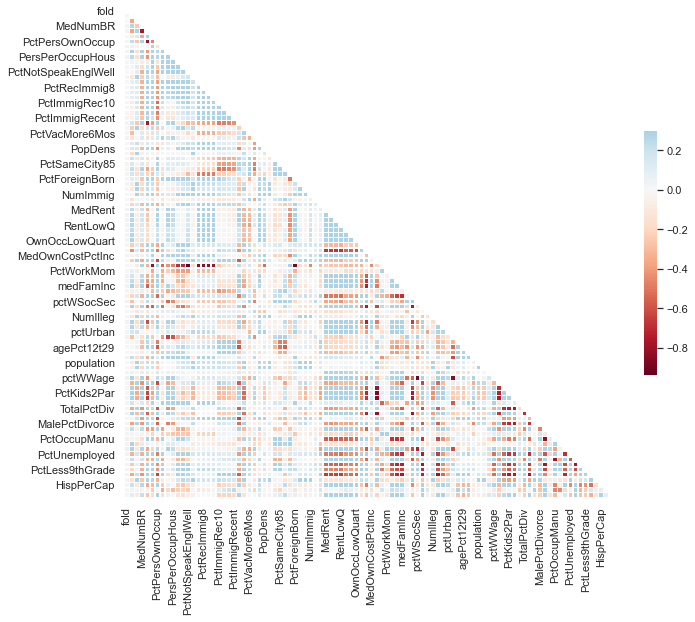

In [23]:
import seaborn as sns
sns.set(style="white")

# Policzenie macierzy korelacji
corr = df[features].corr()

# Wygenerowanie mapy do wyświetlenia jedynie dolnego trójkąta macierzy korelacji  
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Stworzenie obiektów do wizualizacji
f, ax = plt.subplots(figsize=(11, 9))

# Wyświetlenie macierzy korelacji
sns.heatmap(corr, mask=mask, cmap="RdBu", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Wizualizacja nam za bardzo nie pomoże w automatycznym grupowaniu. Uruchomimy teraz kod, który wyświetli z dużej tabeli korelacji te grupy które są silnie skorelowane (np korelacja spearmana powyżej 0.8).

In [24]:
# Policzenie macierzy korelacji
corr = df[features].corr(method="spearman")

# Pętla po wierszach
for row in corr.iterrows():
    # Zapisanie wiersza
    s = row[1]
    # Wydrukowanie pierwszego elementu wiersza
    print(row[0])
    # Wydrukowane elementów, dla których korelacja jest większa niż 80%
    print(s[np.abs(s)>0.8])
    # Zapisaeni zmiennych najbardziej skorelowanych
    print(s[np.abs(s)>0.8].index.tolist())
    print("\n")

fold
fold    1.0
Name: fold, dtype: float64
['fold']


PctHousOccup
PctHousOccup    1.0
Name: PctHousOccup, dtype: float64
['PctHousOccup']


HousVacant
HousVacant    1.0
Name: HousVacant, dtype: float64
['HousVacant']


MedNumBR
MedNumBR          1.000000
PctHousLess3BR   -0.849387
Name: MedNumBR, dtype: float64
['MedNumBR', 'PctHousLess3BR']


PctHousLess3BR
MedNumBR         -0.849387
PctHousLess3BR    1.000000
Name: PctHousLess3BR, dtype: float64
['MedNumBR', 'PctHousLess3BR']


PctPersDenseHous
PctPersDenseHous    1.0
Name: PctPersDenseHous, dtype: float64
['PctPersDenseHous']


PctPersOwnOccup
PctPersOwnOccup    1.000000
PctHousOwnOcc      0.977963
Name: PctPersOwnOccup, dtype: float64
['PctPersOwnOccup', 'PctHousOwnOcc']


PersPerRentOccHous
PersPerRentOccHous    1.0
Name: PersPerRentOccHous, dtype: float64
['PersPerRentOccHous']


PersPerOwnOccHous
PersPerOwnOccHous    1.000000
PersPerOccupHous     0.894069
PersPerFam           0.847186
Name: PersPerOwnOccHous, dtype: float64
['

Name: PctWorkMomYoungKids, dtype: float64
['PctWorkMom', 'PctWorkMomYoungKids']


PctOccupManu
PctOccupMgmtProf   -0.866186
PctOccupManu        1.000000
PctBSorMore        -0.839204
PctNotHSGrad        0.806911
Name: PctOccupManu, dtype: float64
['PctOccupMgmtProf', 'PctOccupManu', 'PctBSorMore', 'PctNotHSGrad']


PctEmplManu
PctEmplManu    1.0
Name: PctEmplManu, dtype: float64
['PctEmplManu']


PctEmploy
pctWWage     0.856595
PctEmploy    1.000000
Name: PctEmploy, dtype: float64
['pctWWage', 'PctEmploy']


PctUnemployed
pctWPubAsst      0.82518
PctUnemployed    1.00000
Name: PctUnemployed, dtype: float64
['pctWPubAsst', 'PctUnemployed']


PctBSorMore
PctOccupMgmtProf    0.951959
PctOccupManu       -0.839204
PctBSorMore         1.000000
PctNotHSGrad       -0.818492
Name: PctBSorMore, dtype: float64
['PctOccupMgmtProf', 'PctOccupManu', 'PctBSorMore', 'PctNotHSGrad']


PctNotHSGrad
PctOccupManu       0.806911
PctBSorMore       -0.818492
PctNotHSGrad       1.000000
PctLess9thGrade    0.95

Przeglądając powyższą listę możemy już ręcznie wybrać następujące grupy skorelowanych zmiennych.

In [25]:
corrGroups = [
['PersPerOwnOccHous', 'PersPerOccupHous', 'householdsize', 'PersPerFam'],
['FemalePctDiv', 'TotalPctDiv', 'MalePctDivorce'],
['pctWSocSec', 'agePct65up', 'pctWWage'],
['PctNotSpeakEnglWell', 'PctRecImmig10', 'PctRecImmig8', 'PctRecImmig5', 'PctRecentImmig', 'PctForeignBorn', 'NumImmig', 'PctSpeakEnglOnly'],
['MedRent', 'RentHighQ', 'RentMedian', 'RentLowQ', 'OwnOccHiQuart', 'OwnOccMedVal', 'OwnOccLowQuart', 'medFamInc', 'medIncome'],
['PctHousNoPhone', 'perCapInc', 'medFamInc', 'pctWInvInc', 'medIncome', 'PctKids2Par', 'PctYoungKids2Par', 'PctPopUnderPov'],
['PctOccupManu', 'PctBSorMore', 'PctNotHSGrad', 'PctLess9thGrade'],
]

Wykonanie modeli dla skorelowanych zmiennych:

In [26]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import roc_auc_score

# Przygotujmy prosty wrapper
def CVTestKNN(nFolds = 5, randomState=2020, debug=False, features=features, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # Aby oszczędzać pamięć informacja o foldach to wyłącznie numery wierszy
    testResults = []
    
    # Dla kompletności dodamy informację o w ynikach na zbiorze treningowym
    trainResults = []
    
    # Przechowajmy również predykcje dla poszczególnych foldów
    predictions = []
    # Razem z informacją o tym, jaki był ich indeks w oryginalnym zbiorze danych
    indices = []
    for train, test in kf.split(df.index.values):
        # Przygotowanie estymatora
        clf = neighbors.KNeighborsClassifier(*args, **kwargs)
        if debug:
            print(clf)
        # Trenowanie modelu
        clf.fit(df.iloc[train][features], df.iloc[train][target])

        # Przygotowanie prognoz dla zbioru traeningowego i testowego
        # UWAGA Sklearn zwracałbędzie dwie kolumny prawdopodobieństw dla obydwu klas
        predsTrain = clf.predict_proba(df.iloc[train][features])[:,1]
        preds = clf.predict_proba(df.iloc[test][features])[:,1]
        
        # Zachowajmy informacje o predykcjach dla tego foldu
        predictions.append(preds.tolist().copy())
        
        # Razem z indeksami w oryginalnym data frame
        indices.append(df.iloc[test].index.tolist().copy())
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi możemy opcjonalnie wyświetlać w trakcie
        trainScore = roc_auc_score(df[target].iloc[train], predsTrain)
        testScore = roc_auc_score(df[target].iloc[test], preds)
        
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return trainResults, testResults, predictions, indices


C:\Users\pcwia\.conda\envs\ds\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [27]:
for i, group in enumerate(corrGroups):
    trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=150, n_jobs=-1, p=1, features=group)
    print(np.mean(testResults), group)
    # Predykcje na podstawie wiedzy z grup skorelowanych zmiennych
    # Przypiszemy do nowej zmiennej
    df[f"group_{i}"] = pd.Series(sum(predictions, []), index=sum(indices, [])).sort_index()

0.8125187192068799 ['PersPerOwnOccHous', 'PersPerOccupHous', 'householdsize', 'PersPerFam']
0.7943764359282015 ['FemalePctDiv', 'TotalPctDiv', 'MalePctDivorce']
0.7567855607170187 ['pctWSocSec', 'agePct65up', 'pctWWage']
0.6967185952185524 ['PctNotSpeakEnglWell', 'PctRecImmig10', 'PctRecImmig8', 'PctRecImmig5', 'PctRecentImmig', 'PctForeignBorn', 'NumImmig', 'PctSpeakEnglOnly']
0.8279790625870852 ['MedRent', 'RentHighQ', 'RentMedian', 'RentLowQ', 'OwnOccHiQuart', 'OwnOccMedVal', 'OwnOccLowQuart', 'medFamInc', 'medIncome']
0.9004512050915212 ['PctHousNoPhone', 'perCapInc', 'medFamInc', 'pctWInvInc', 'medIncome', 'PctKids2Par', 'PctYoungKids2Par', 'PctPopUnderPov']
0.7939825416116698 ['PctOccupManu', 'PctBSorMore', 'PctNotHSGrad', 'PctLess9thGrade']


Jak widać predykcje nie są doskonałe na tylko tych zmiennych. Następnie z listy zmiennych usuniemy zmienne na podstawie których robiliśmy pierwszą predykcję, a następnie nowostworzone zmienne dodamy do listy.

In [28]:
for i, group in enumerate(corrGroups):
    # Iterujemy po zmiennych wewnątrz grupy aby usunąć z listy featerów
    for feat in group:
        # Dodamy obsługę błędów, aby bez problemu móc wykonywać kod dwukrotnie
        try:
            features.remove()
        except:
            pass
    # Dodajemy nową zmienną
    if f"group_{i}" not in features:
        features.append(f"group_{i}")

Od teraz nasz wektor `features` zawiera już mniej zmiennych i będzie korzystał z wcześniejszego modelowania na podstawie skolerowanych grup.

In [29]:
print(len(features))

103


In [30]:
trainResults, testResults, predictions, indices, models = CVTestLinearClass(penalty="none", max_iter = 2000)
print(np.mean(testResults))

0.9104628525319309


In [31]:
for alpha in [0.001, 0.01, 0.1, 0.25, 0.5, 1, 2, 5]:
    trainResults, testResults, predictions, indices, models = CVTestLinearClass(penalty="l1", solver="liblinear", C=alpha, random_state=2020)
    print("Alpha:", alpha, "Train", np.mean(trainResults), "Test", np.mean(testResults))

Alpha: 0.001 Train 0.5181786642904551 Test 0.5213159195121765
Alpha: 0.01 Train 0.6706188337691656 Test 0.6717304255567622
Alpha: 0.1 Train 0.9159033114024645 Test 0.9139394479775019
Alpha: 0.25 Train 0.921919053891423 Test 0.9181773173656799
Alpha: 0.5 Train 0.9258337604485367 Test 0.918674114661373
Alpha: 1 Train 0.9322776406776363 Test 0.9211436958612012
Alpha: 2 Train 0.93738357440666 Test 0.920446085685677
Alpha: 5 Train 0.9429967683486463 Test 0.9172740946308849


In [32]:
for alpha in [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10, 50, 100]:
    trainResults, testResults, predictions, indices, models = CVTestLinearClass(penalty="l2", C=alpha, random_state=2020,
                                                                               max_iter = 2000)
    print("Alpha:", alpha, "Train", np.mean(trainResults), "Test", np.mean(testResults))

Alpha: 0.01 Train 0.910170944806308 Test 0.9075318653262711
Alpha: 0.1 Train 0.9218069141571392 Test 0.916237260418983
Alpha: 0.25 Train 0.9263277282242608 Test 0.9177180504398537
Alpha: 0.5 Train 0.9301395113223698 Test 0.9184309628659075
Alpha: 1 Train 0.9338994427720667 Test 0.9192479369995319
Alpha: 2 Train 0.9373745343776397 Test 0.9192615176031793
Alpha: 5 Train 0.9413215278735241 Test 0.9189668821375626
Alpha: 10 Train 0.9436708513746709 Test 0.9186089770794783
Alpha: 50 Train 0.9469885150443293 Test 0.9164845567667763
Alpha: 100 Train 0.9477504884582719 Test 0.9149515242056495


Możemy zauwazyć, że zdecydowanie poprawił się wynik bez regularyzacji. Co więcej poprawił się również, chociaż nieznacznie, najlepszy wynik z regularyzacją. Co jednak ważne wyniki z regularyzacją stały się bardziej stabilne, mniej wrazliwe na dobranie odpowiedniego parametru określającego siłę regularyzacji.